In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#loading training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 13898 images belonging to 22 classes.


In [6]:
#loading test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 1543 images belonging to 22 classes.


In [7]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(train_data.num_classes, activation='softmax')
])

2026-02-07 11:15:57.204400: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2026-02-07 11:15:57.204471: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2026-02-07 11:15:57.204487: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2026-02-07 11:15:57.204604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-07 11:15:57.204935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [10]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=test_data
)

Epoch 1/15


2026-02-07 11:16:46.169191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - ETA: 0s - loss: 0.1915 - accuracy: 0.1385   

2026-02-07 11:18:03.696549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 83s 188ms/step - loss: 0.1915 - accuracy: 0.1385 - val_loss: 0.1622 - val_accuracy: 0.2132
Epoch 2/15
435/435 [==============================] - 83s 190ms/step - loss: 0.1742 - accuracy: 0.1905 - val_loss: 0.1625 - val_accuracy: 0.2469
Epoch 3/15
435/435 [==============================] - 82s 188ms/step - loss: 0.1745 - accuracy: 0.2051 - val_loss: 0.1587 - val_accuracy: 0.2657
Epoch 4/15
435/435 [==============================] - 83s 190ms/step - loss: 0.1738 - accuracy: 0.2141 - val_loss: 0.1688 - val_accuracy: 0.2761
Epoch 5/15
435/435 [==============================] - 83s 191ms/step - loss: 0.1727 - accuracy: 0.2233 - val_loss: 0.1624 - val_accuracy: 0.2871
Epoch 6/15
435/435 [==============================] - 95s 218ms/step - loss: 0.1695 - accuracy: 0.2316 - val_loss: 0.1596 - val_accuracy: 0.2625
Epoch 7/15
435/435 [==============================] - 110s 254ms/step - loss: 0.1712 - accuracy: 0.2377 - val_loss: 0.1665 - val_accuracy: 0.

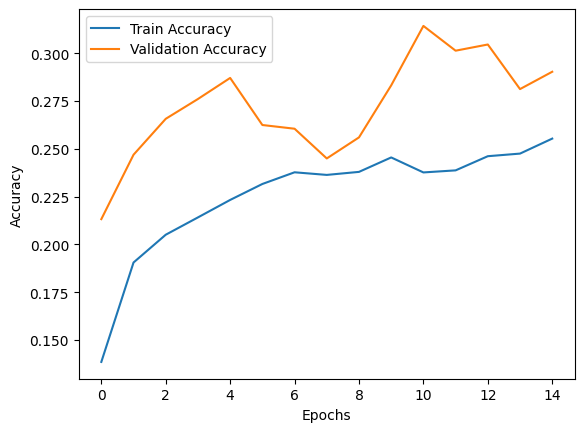

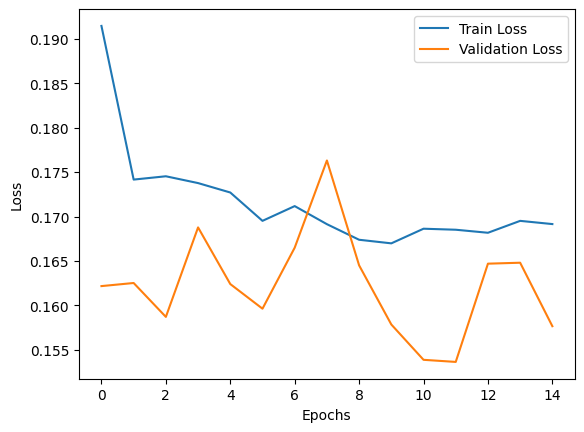

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [14]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3)
)

base_model.trainable = False   # VERY IMPORTANT

In [15]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

Epoch 1/10


2026-02-07 11:41:27.801167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - ETA: 0s - loss: 5.4454 - accuracy: 0.1998   

2026-02-07 11:43:08.949721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 111s 252ms/step - loss: 5.4454 - accuracy: 0.1998 - val_loss: 2.7009 - val_accuracy: 0.3383
Epoch 2/10
435/435 [==============================] - 101s 232ms/step - loss: 3.8915 - accuracy: 0.2593 - val_loss: 2.2898 - val_accuracy: 0.3610
Epoch 3/10
435/435 [==============================] - 112s 257ms/step - loss: 2.8718 - accuracy: 0.2920 - val_loss: 2.1358 - val_accuracy: 0.3675
Epoch 4/10
435/435 [==============================] - 115s 264ms/step - loss: 2.4738 - accuracy: 0.3131 - val_loss: 2.0978 - val_accuracy: 0.3824
Epoch 5/10
435/435 [==============================] - 109s 250ms/step - loss: 2.3600 - accuracy: 0.3263 - val_loss: 2.0696 - val_accuracy: 0.3785
Epoch 6/10
435/435 [==============================] - 103s 236ms/step - loss: 2.3179 - accuracy: 0.3357 - val_loss: 2.1747 - val_accuracy: 0.3655
Epoch 7/10
435/435 [==============================] - 102s 235ms/step - loss: 2.3381 - accuracy: 0.3348 - val_loss: 2.1707 - val_accura

In [18]:
# Unfreeze last 30 layers
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
history_finetune = model.fit(
    train_data,
    validation_data=test_data,
    epochs=5
)

Epoch 1/5


2026-02-07 12:00:09.176517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - ETA: 0s - loss: 2.3947 - accuracy: 0.3386   

2026-02-07 12:01:51.066449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 111s 249ms/step - loss: 2.3947 - accuracy: 0.3386 - val_loss: 2.3377 - val_accuracy: 0.3901
Epoch 2/5
435/435 [==============================] - 129s 297ms/step - loss: 1.9971 - accuracy: 0.4019 - val_loss: 2.0203 - val_accuracy: 0.4154
Epoch 3/5
435/435 [==============================] - 116s 267ms/step - loss: 1.8645 - accuracy: 0.4398 - val_loss: 1.9491 - val_accuracy: 0.4336
Epoch 4/5
435/435 [==============================] - 107s 245ms/step - loss: 1.7789 - accuracy: 0.4623 - val_loss: 1.9289 - val_accuracy: 0.4413
Epoch 5/5
435/435 [==============================] - 113s 261ms/step - loss: 1.6935 - accuracy: 0.4900 - val_loss: 1.9428 - val_accuracy: 0.4271


In [21]:
# Unfreeze the top layers of the base model
base_model.trainable = True

fine_tune_at = len(base_model.layers) - 30

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [22]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

In [24]:
history_fine = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/10


2026-02-07 12:10:44.691003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - ETA: 0s - loss: 1.5624 - accuracy: 0.5228   

2026-02-07 12:12:28.010178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 113s 255ms/step - loss: 1.5624 - accuracy: 0.5228 - val_loss: 1.7888 - val_accuracy: 0.4647 - lr: 1.0000e-05
Epoch 2/10
435/435 [==============================] - 104s 240ms/step - loss: 1.5474 - accuracy: 0.5260 - val_loss: 1.7523 - val_accuracy: 0.4796 - lr: 1.0000e-05
Epoch 3/10
435/435 [==============================] - 103s 236ms/step - loss: 1.5300 - accuracy: 0.5336 - val_loss: 1.7324 - val_accuracy: 0.4919 - lr: 1.0000e-05
Epoch 4/10
435/435 [==============================] - 109s 250ms/step - loss: 1.5076 - accuracy: 0.5455 - val_loss: 1.7235 - val_accuracy: 0.4958 - lr: 1.0000e-05
Epoch 5/10
435/435 [==============================] - 114s 261ms/step - loss: 1.5086 - accuracy: 0.5390 - val_loss: 1.7026 - val_accuracy: 0.4984 - lr: 1.0000e-05
Epoch 6/10
435/435 [==============================] - 107s 246ms/step - loss: 1.4895 - accuracy: 0.5461 - val_loss: 1.6934 - val_accuracy: 0.4984 - lr: 1.0000e-05
Epoch 7/10
435/435 [=============

In [25]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = train_data.classes
class_labels = np.unique(classes)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=classes
)
class_weights = dict(zip(class_labels, class_weights))
print(class_weights)


{0: 1.0653073739077112, 1: 0.844555177442878, 2: 0.577975546868502, 3: 1.2534271284271283, 4: 2.5472873900293256, 5: 1.1548944656805717, 6: 0.6254725472547255, 7: 1.2055863983344899, 8: 1.1423639651487754, 9: 2.031277404267758, 10: 1.7499370435658523, 11: 0.7703991130820399, 12: 2.4871152469577664, 13: 1.3884115884115884, 14: 0.9115833661288206, 15: 2.0247668997668997, 16: 0.6844282478085295, 17: 0.3826331149165795, 18: 1.1634019755566718, 19: 1.3703411555906133, 20: 0.8847720906544436, 21: 1.0891849529780564}


In [26]:
history_weighted = model.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    class_weight=class_weights,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/5


2026-02-07 12:29:20.474743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 109s 246ms/step - loss: 1.5905 - accuracy: 0.5560 - val_loss: 1.7068 - val_accuracy: 0.4867 - lr: 1.0000e-05
Epoch 2/5
435/435 [==============================] - 107s 245ms/step - loss: 1.5464 - accuracy: 0.5542 - val_loss: 1.7003 - val_accuracy: 0.4880 - lr: 1.0000e-05
Epoch 3/5
435/435 [==============================] - 104s 239ms/step - loss: 1.5376 - accuracy: 0.5584 - val_loss: 1.7001 - val_accuracy: 0.4919 - lr: 1.0000e-05
Epoch 4/5
435/435 [==============================] - 104s 240ms/step - loss: 1.5332 - accuracy: 0.5533 - val_loss: 1.7204 - val_accuracy: 0.4964 - lr: 1.0000e-05
Epoch 5/5
435/435 [==============================] - 107s 247ms/step - loss: 1.5208 - accuracy: 0.5611 - val_loss: 1.7022 - val_accuracy: 0.4964 - lr: 1.0000e-05


In [27]:
import numpy as np

# Get true labels
y_true = test_data.classes

# Predict probabilities
y_pred_prob = model.predict(test_data)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)


2026-02-07 12:38:18.062279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 8s 143ms/step


In [28]:
from sklearn.metrics import classification_report

class_names = list(test_data.class_indices.keys())

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names
)

print(report)

                     precision    recall  f1-score   support

               Acne       0.03      0.03      0.03        64
  Actinic_Keratosis       0.05      0.02      0.03        83
      Benign_tumors       0.02      0.01      0.01       121
            Bullous       0.05      0.04      0.04        55
        Candidiasis       0.02      0.04      0.02        27
       DrugEruption       0.02      0.02      0.02        61
             Eczema       0.06      0.06      0.06       112
 Infestations_Bites       0.00      0.00      0.00        60
             Lichen       0.03      0.02      0.02        61
              Lupus       0.03      0.03      0.03        34
              Moles       0.02      0.03      0.02        39
          Psoriasis       0.03      0.03      0.03        88
            Rosacea       0.00      0.00      0.00        28
  Seborrh_Keratoses       0.03      0.02      0.02        51
         SkinCancer       0.05      0.04      0.04        76
Sun_Sunlight_Damage    

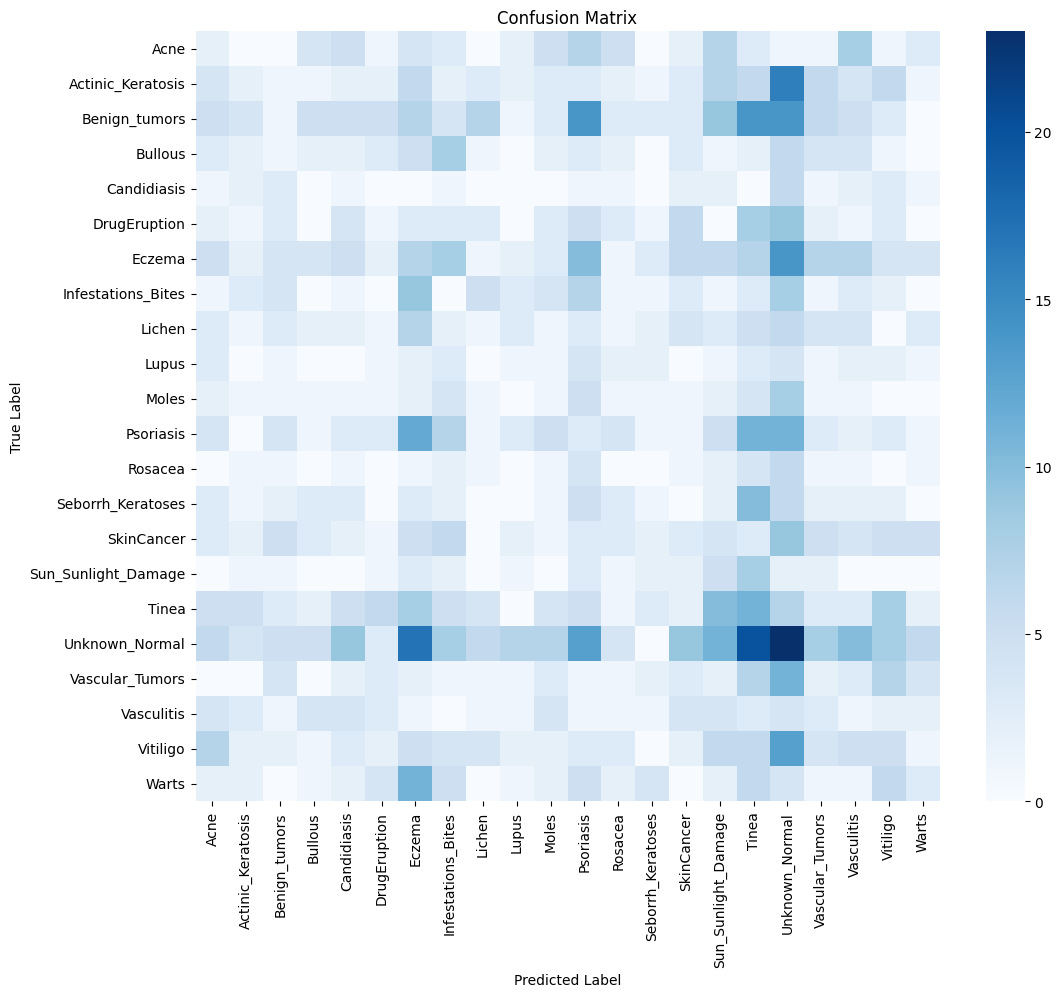

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [30]:
from sklearn.metrics import accuracy_score

final_accuracy = accuracy_score(y_true, y_pred)
print("Final Validation Accuracy:", final_accuracy)


Final Validation Accuracy: 0.0492546986390149


2026-02-07 12:38:51.378788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Predicted Skin Disease: Acne
Confidence: 68.67 %


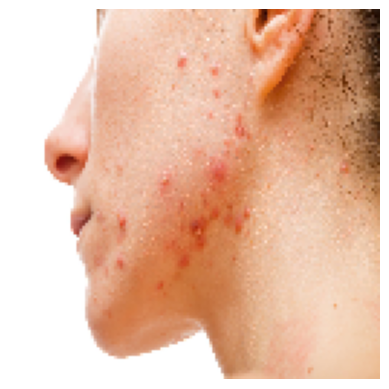

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ====== Image Path ======
img_path = "test_images/Acne_share.jpg"

# ====== Load Image ======
img = image.load_img(img_path, target_size=(128, 128)) 

plt.imshow(img)
plt.axis("off")

# ====== Preprocess ======
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ====== Prediction ======
prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction)

# ====== Class Labels ======
class_labels = list(test_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

print("Predicted Skin Disease:", predicted_class)
print("Confidence:", round(confidence*100, 2), "%")

1/1 [==============================] - 0s 165ms/step
Predicted Skin Disease: Vitiligo
Confidence: 99.99 %


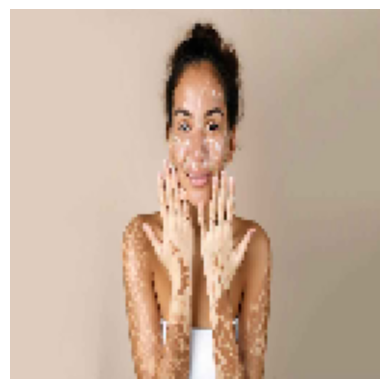

In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ====== Image Path ======
img_path = "test_images/image3.jpg"


# ====== Load Image ======
img = image.load_img(img_path, target_size=(128, 128)) 

plt.imshow(img)
plt.axis("off")

# ====== Preprocess ======
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ====== Prediction ======
prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction)

# ====== Class Labels ======
class_labels = list(test_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

print("Predicted Skin Disease:", predicted_class)
print("Confidence:", round(confidence*100, 2), "%")

1/1 [==============================] - 0s 39ms/step
Predicted Skin Disease: Moles
Confidence: 82.93 %


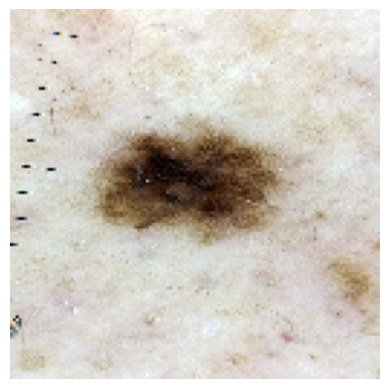

In [33]:
# ====== Image Path ======
img_path = "test_images/image9.jpg"
# You can change filename here anytime

# ====== Load Image ======
img = image.load_img(img_path, target_size=(128, 128)) 

plt.imshow(img)
plt.axis("off")

# ====== Preprocess ======
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ====== Prediction ======
prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction)

# ====== Class Labels ======
class_labels = list(test_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]
print("Predicted Skin Disease:", predicted_class)
print("Confidence:", round(confidence*100, 2), "%")

1/1 [==============================] - 0s 35ms/step
Predicted Skin Disease: Infestations_Bites
Confidence: 26.1 %


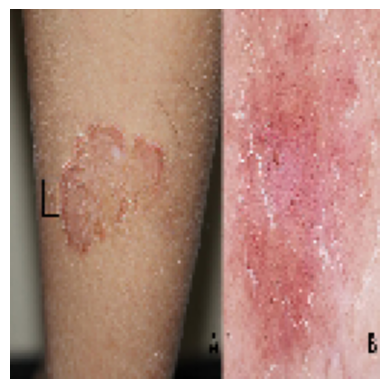

In [34]:
# ====== Image Path ======
img_path = "test_images/image1.jpg"
# ====== Load Image ======
img = image.load_img(img_path, target_size=(128, 128)) 

plt.imshow(img)
plt.axis("off")

# ====== Preprocess ======
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ====== Prediction ======
prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction)

# ====== Class Labels ======
class_labels = list(test_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]
print("Predicted Skin Disease:", predicted_class)
print("Confidence:", round(confidence*100, 2), "%")

1/1 [==============================] - 0s 30ms/step
Predicted Skin Disease: Lupus
Confidence: 21.29 %


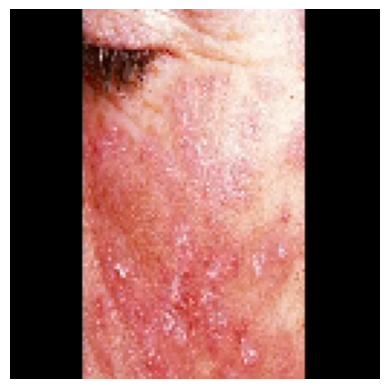

In [35]:
# ====== Image Path ======
img_path = "test_images/image11.webp"


# ====== Load Image ======
img = image.load_img(img_path, target_size=(128, 128)) 

plt.imshow(img)
plt.axis("off")

# ====== Preprocess ======
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ====== Prediction ======
prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction)

# ====== Class Labels ======
class_labels = list(test_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]
print("Predicted Skin Disease:", predicted_class)
print("Confidence:", round(confidence*100, 2), "%")

In [36]:
# Save full model
model.save("skin_disease_model.h5")

print("Model saved successfully!")

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!
